**Import the necessary packages** 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**import the dataset**

In [72]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/most_runs_in_cricket.csv')
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,2,RT Ponting (AUS/ICC),1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,3,DPMD Jayawardene (Asia/SL),1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,4,JH Kallis (Afr/ICC/SA),1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   Player      88 non-null     object 
 2   Span        88 non-null     object 
 3   Mat         88 non-null     int64  
 4   Inns        88 non-null     int64  
 5   NO          88 non-null     int64  
 6   Runs        88 non-null     int64  
 7   HS          88 non-null     int64  
 8   Ave         88 non-null     float64
 9   BF          88 non-null     object 
 10  SR          88 non-null     float64
 11  100         88 non-null     int64  
 12  50          88 non-null     int64  
 13  0           88 non-null     int64  
 14  4s          88 non-null     int64  
 15  6s          88 non-null     int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 11.1+ KB


In [113]:
df.shape

(88, 20)

**Processing the dataset adding a column of Country**

In [75]:
import re
Names =[]
Country=[]
for x in df['Player']:
    a=  re.split("[()\xa0]", x)
    Names.append(a[0])
    b = re.split("/",a[1])
    
    for y in b:
        if(y!='Asia' and y!='ICC' and y!='Afr' and y!='IRE' and y!='World'):
            Country.append(y)
            
Names = pd.Series(Names, name='Player Name')
Country = pd.Series(Country, name='Country Name')
df['Player Name']= Names
df['Country']=Country


Extracting total number of year a player play cricket

In [76]:
Start_Y =[]
End_Y=[]
for x in df['Span']:
    a=  re.split("-", x)
    Start_Y.append(int(a[0]))
    End_Y.append(int(a[1]))

Start_Y = pd.Series(Start_Y, name='Beginning Year')
End_Y = pd.Series(End_Y, name='Retire Year')


df['Career Span'] = End_Y - Start_Y

In [77]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,88.0,NaN,NaN,NaN,43.5,25.547342,0.0,21.75,43.5,65.25,87.0
Player,88,88,SR Tendulkar (INDIA),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Span,88,71,2010-2022,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mat,88.0,NaN,NaN,NaN,365.431818,104.13583,202.0,285.75,360.5,425.25,664.0
Inns,88.0,NaN,NaN,NaN,421.329545,107.002495,252.0,337.0,410.0,467.25,782.0
NO,88.0,NaN,NaN,NaN,46.943182,24.002566,12.0,30.75,41.0,62.25,142.0
Runs,88.0,NaN,NaN,NaN,15301.284091,4665.091415,10028.0,11728.5,13986.0,17274.5,34357.0
HS,88.0,NaN,NaN,NaN,241.784091,57.5211,135.0,199.75,232.5,278.5,400.0
Ave,88.0,NaN,NaN,NaN,40.816364,5.230841,23.92,37.66,40.545,44.87,53.62
BF,88,88,50817+,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
df.describe

<bound method NDFrame.describe of     Unnamed: 0                       Player       Span  Mat  Inns  NO   Runs  \
0            0         SR Tendulkar (INDIA)  1989-2013  664   782  74  34357   
1            1  KC Sangakkara (Asia/ICC/SL)  2000-2015  594   666  67  28016   
2            2         RT Ponting (AUS/ICC)  1995-2012  560   668  70  27483   
3            3   DPMD Jayawardene (Asia/SL)  1997-2015  652   725  62  25957   
4            4       JH Kallis (Afr/ICC/SA)  1995-2014  519   617  97  25534   
..         ...                          ...        ...  ...   ...  ..    ...   
83          83        DB Vengsarkar (INDIA)  1976-1992  245   305  41  10376   
84          84         ME Trescothick (ENG)  2000-2006  202   268  16  10326   
85          85            G Gambhir (INDIA)  2003-2016  242   283  18  10324   
86          86                MD Crowe (NZ)  1982-1995  220   271  29  10148   
87          87              GW Flower (ZIM)  1992-2010  288   337  24  10028   

     

In [114]:
df.shape

(88, 20)

#How long a specific player play cricket in descending order

In [238]:
df.groupby(['Career Span','Player Name']).max('Career Span').sort_values('Career Span',ascending=False)


Unnamed: 0  Mat  Inns  NO   Runs   HS    Ave  \
Career Span Player Name                                                     
24          SR Tendulkar              0  664   782  74  34357  248  48.52   
22          Shoaib Malik             63  446   429  79  11867  245  33.90   
            Shahid Afridi            71  524   508  40  11196  156  23.92   
            ST Jayasuriya             8  586   651  35  21032  340  34.14   
            CH Gayle                 12  483   551  35  19593  333  37.97   
...                                 ...  ...   ...  ..    ...  ...    ...   
10          F du Plessis             70  262   304  41  11198  199  42.57   
9           AJ Strauss               69  231   308  14  11315  177  38.48   
            MEK Hussey               60  302   324  71  12398  195  49.00   
7           Babar Azam               77  226   252  34  11017  196  50.53   
6           ME Trescothick           84  202   268  16  10326  219  40.97   

                                 SR  100   50   0    4s   6s    Run/Mat  
Career Span Player Name                                                  
24          SR Tendulkar      67.58  100  164  34  4076  264  51.742470  
22          Shoaib Malik      77.60   12   61  23  1038  199  26.607623  
            Shahid Afridi    114.14   11   51  44  1053  476  21.366412  
            ST Jayasuriya     81.17   42  103  53  2486  352  35.890785  
            CH Gayle          77.22   42  105  44  2332  553  40.565217  
...                             ...  ...  ...  ..   ...  ...        ...  
10          F du Plessis      68.53   23   66  12  1151  137  42.740458  
9           AJ Strauss        57.60   27   54  25  1330   35  48.982684  
            MEK Hussey        64.54   22   72  16  1126  144  41.052980  
7           Babar Azam        81.49   26   74  14  1124  114  48.747788  
6           ME Trescothick    64.93   26   52  25  1382   84  51.118812  

[88 rows x 14 columns]

#Most number of runs make by player in descending order

In [79]:
df.groupby(['Runs','Player Name']).max('Career Span').sort_values('Runs',ascending=False)

,,Unnamed: 0,Mat,Inns,NO,HS,Ave,SR,100,50,0,4s,6s,Career Span
Runs,Player Name,,,,,,,,,,,,,
34357,SR Tendulkar,0,664,782,74,248,48.52,67.58,100,164,34,4076,264,24
28016,KC Sangakkara,1,594,666,67,319,46.77,66.56,63,153,28,3015,159,15
27483,RT Ponting,2,560,668,70,257,45.95,68.48,71,146,39,2781,246,17
25957,DPMD Jayawardene,3,652,725,62,374,39.15,64.73,54,136,47,2679,170,18
25534,JH Kallis,4,519,617,97,224,49.10,56.30,62,149,33,2455,254,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10376,DB Vengsarkar,83,245,305,41,166,39.30,50.04,18,58,22,737,41,16
10326,ME Trescothick,84,202,268,16,219,40.97,64.93,26,52,25,1382,84,6
10324,G Gambhir,85,242,283,18,206,38.95,68.85,20,63,20,1188,37,13


#Player play with highest average

In [80]:
df.groupby(['Ave','Player Name']).max('Career Span').sort_values('Ave',ascending=False)

,,Unnamed: 0,Mat,Inns,NO,Runs,HS,SR,100,50,0,4s,6s,Career Span
Ave,Player Name,,,,,,,,,,,,,
53.62,V Kohli,6,473,527,77,24130,254,79.15,71,125,33,2400,258,14
50.53,Babar Azam,77,226,252,34,11017,196,81.49,26,74,14,1124,114,7
49.24,SPD Smith,45,285,325,43,13887,239,65.21,40,67,13,1399,114,12
49.10,JH Kallis,4,519,617,97,25534,224,56.30,62,149,33,2455,254,19
49.03,JE Root,20,314,405,46,17604,254,65.73,44,95,20,1756,90,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32.51,Mohammad Hafeez,57,392,429,36,12780,224,74.24,21,64,34,1370,214,18
32.27,MN Samuels,73,345,388,43,11134,260,65.23,17,64,25,1207,219,18
32.03,GW Flower,87,288,337,24,10028,201,50.81,12,55,34,906,53,18


#Most number of player from different countries most player are from australia and list are from zim

In [225]:
df.groupby(['Country','Player Name']).max()

Unnamed: 0                  Player       Span  Mat  \
Country Player Name                                                          
AUS     AC Gilchrist            35  AC Gilchrist (AUS/ICC)  1996-2008  396   
        AR Border               18         AR Border (AUS)  1978-1994  429   
        DA Warner               27         DA Warner (AUS)  2009-2022  329   
        DC Boon                 49           DC Boon (AUS)  1984-1996  288   
        MA Taylor               76         MA Taylor (AUS)  1989-1999  217   
...                            ...                     ...        ...  ...   
WI      RB Richardson           61      RB Richardson (WI)  1983-1996  310   
        RR Sarwan               62          RR Sarwan (WI)  2000-2013  286   
        S Chanderpaul            9      S Chanderpaul (WI)  1994-2015  454   
ZIM     A Flower                66          A Flower (ZIM)  1992-2003  276   
        GW Flower               87         GW Flower (ZIM)  1992-2010  288   

                        Inns  NO   Runs   HS    Ave      BF     SR  100   50  \
Country Player Name                                                            
AUS     AC Gilchrist     429  32  15461  204  38.94   16910  91.43   33   81   
        AR Border        517  83  17698  205  40.77  36136+  48.76   30  102   
        DA Warner        407  25  16466  335  43.10   19074  86.32   43   84   
        DC Boon          367  36  13386  200  40.44   27273  49.08   26   69   
        MA Taylor        296  14  11039  334  39.14   24048  45.90   20   68   
...                      ...  ..    ...  ...    ...     ...    ...  ...  ...   
WI      RB Richardson    363  42  12197  194  37.99  22199+  54.82   21   71   
        RR Sarwan        339  44  11944  291  40.48   20433  58.45   20   71   
        S Chanderpaul    553  94  20988  203  45.72   40150  52.27   41  125   
ZIM     A Flower         320  35  11580  232  40.63   19733  58.68   16   82   
        GW Flower        337  24  10028  201  32.03   19736  50.81   12   55   

                         0    4s   6s  Career Span    Run/Mat  
Country Player Name                                            
AUS     AC Gilchrist    33  1866  262           12  39.042929  
        AR Border       22  1661   71           16  41.254079  
        DA Warner       20  1833  256           13  50.048632  
        DC Boon         22  1316   18           12  46.479167  
        MA Taylor        9  1000   16           10  50.870968  
...                     ..   ...  ...          ...        ...  
WI      RB Richardson   16  1302   77           13  39.345161  
        RR Sarwan       21  1246   78           13  41.762238  
        S Chanderpaul   21  2041  126           21  46.229075  
ZIM     A Flower        18  1075   46           11  41.956522  
        GW Flower       34   906   53           18  34.819444  

[88 rows x 18 columns]

# players have maximum number of 100s 6s runs 

In [239]:
Top_Run=df[df['Runs'].isin(df.groupby(['Country'])['Runs'].max().values)].reset_index()
Top_Run=Top_Run[['Player Name','100','6s',]]
Top_Run

,Player Name,100,6s
0,SR Tendulkar,100,264
1,KC Sangakkara,63,159
2,RT Ponting,71,246
3,JH Kallis,62,254
4,BC Lara,53,221
5,Inzamam-ul-Haq,35,193
6,LRPL Taylor,40,273
7,JE Root,44,90
8,Tamim Iqbal,25,186
9,A Flower,16,46


#visualize the data

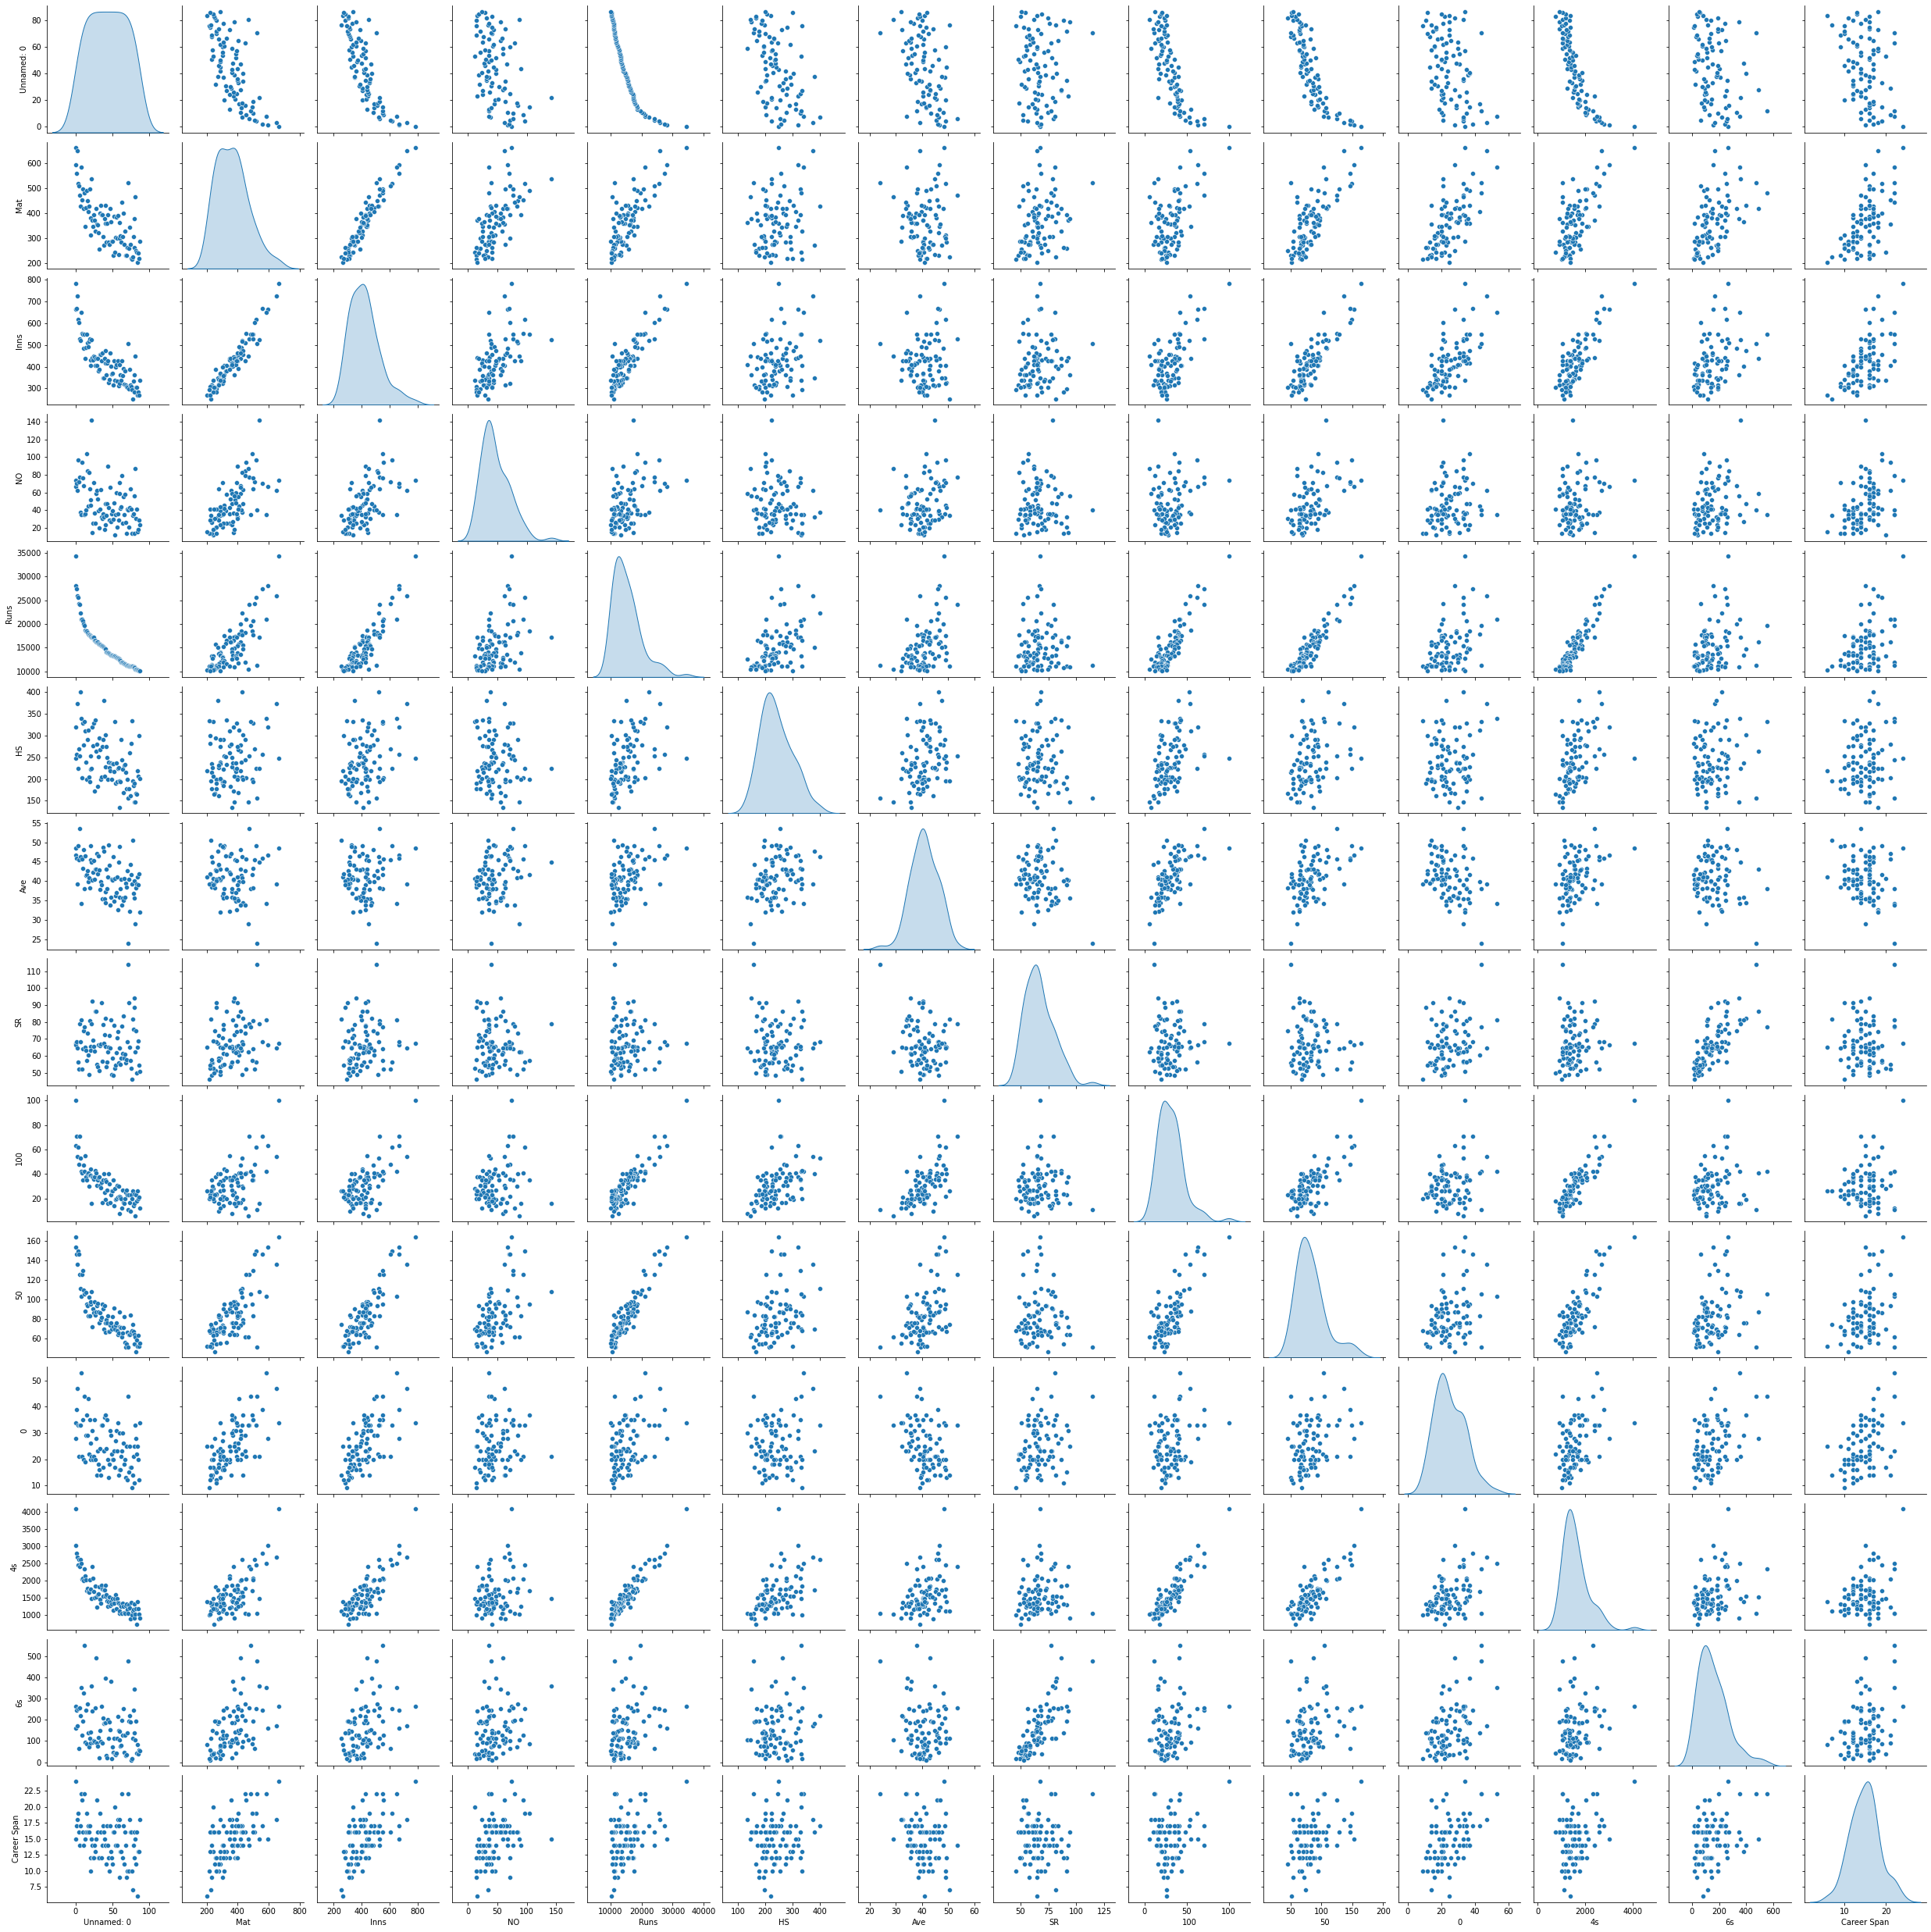

In [82]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde')

#Most runs score from each country India score most zim the least

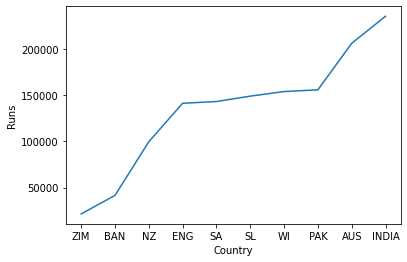

In [83]:
#Top Runs Scored by each Country
Run_sum=df.groupby('Country').sum().sort_values(by='Runs').reset_index()
sns.lineplot(x='Country', y='Runs', data=Run_sum)

#Most runs scorer from pakistan

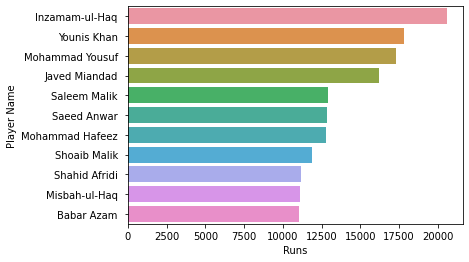

In [90]:
run = df[df['Country']=="PAK"][['Player Name','Runs']].reset_index(drop='index')
sns.barplot(y='Player Name', x='Runs', data=run)


#Runs Score from India

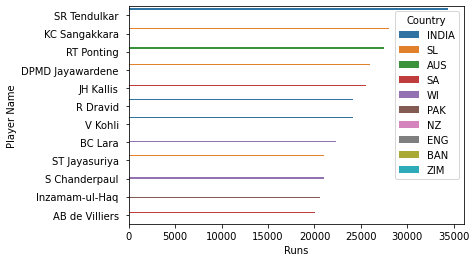

In [237]:
run = df[df.Runs>20000][['Player Name','Runs']].reset_index(drop='index')
plt.legend(loc=1)

sns.barplot(y='Player Name', x='Runs', data=run,hue=df['Country'])

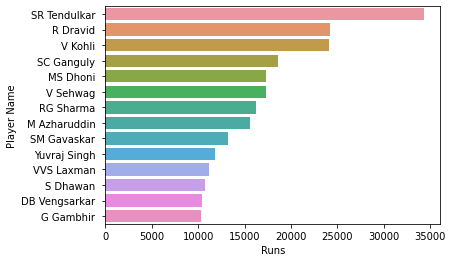

In [91]:
run = df[df['Country']=="INDIA"][['Player Name','Runs']].reset_index(drop='index')
sns.barplot(y='Player Name', x='Runs', data=run)

#Players who played maximum Matches for has country





Text(0.5, 1.0, 'Maximium Matches Played From each Country')

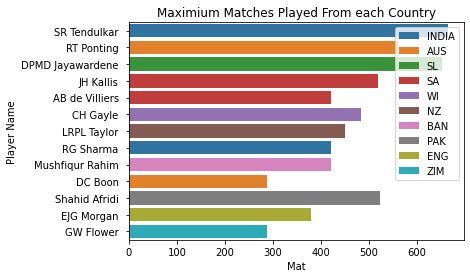

In [104]:
#Top Players who played maximum Matches from each country
Top_Mat=df[df['Mat'].isin(df.groupby('Country').max()['Mat'].values)]
sns.barplot(y='Player Name',x='Mat',data=Top_Mat,hue='Country',dodge=False)
plt.legend(loc=1)
plt.title('Maximium Matches Played From each Country')

#last 5 of runs scorer are from Pak SA, Eng, Ind

Text(0.5, 1.0, 'Player who scored low runs')

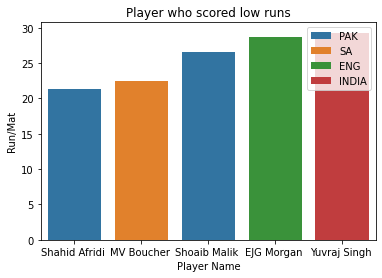

In [105]:
#Top 5 Player who scored low runs
df['Run/Mat']=(df['Runs'] / df['Mat'])
sns.barplot(x='Player Name',y='Run/Mat', hue='Country', data=df.sort_values(ascending=True, by='Run/Mat').head(5), dodge=False)
plt.legend(loc=1)
plt.title('Player who scored low runs')

#Longest Career of a Player

Text(0.5, 1.0, 'Player having Long career span ')

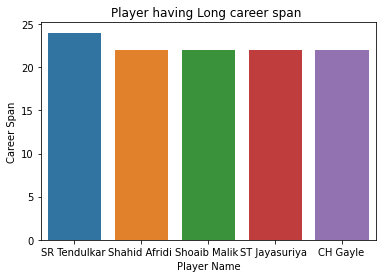

In [106]:
#Career Span of player
sns.barplot(y='Career Span', x='Player Name', data= df.sort_values('Career Span',ascending=False).head(5))
plt.title('Player having Long career span ')

#Most Runs by Batsman

Text(0.5, 1.0, 'Most 100 by batsmen')

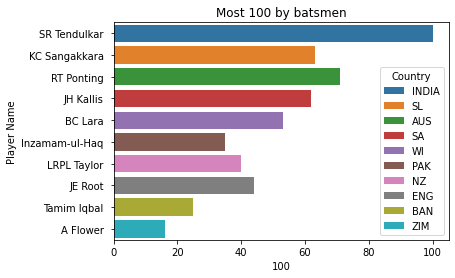

In [109]:
# Most 100 by batsmen
sns.barplot(x='100', y='Player Name',data=Top_Run,hue='Country',dodge=False)
plt.title('Most 100 by batsmen')

#Most 6s by batsman

Text(0.5, 1.0, 'Most 6s by batsmen')

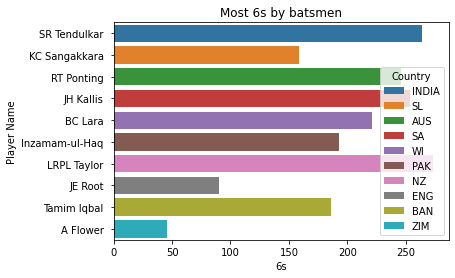

In [111]:
# Most 100 by batsmen
sns.barplot(x='6s', y='Player Name',data=Top_Run,hue='Country',dodge=False)
plt.title('Most 6s by batsmen')

#Preparing Data for models

In [162]:
dataset_sel = df[['Mat','Inns','Runs','50','100','0','4s','BF','6s','Career Span','Ave','Run/Mat','Player Name']]
dataset_sel.shape


(88, 13)

In [163]:
dataset_sel.head(5)

,Mat,Inns,Runs,50,100,0,4s,BF,6s,Career Span,Ave,Run/Mat,Player Name
0,664,782,34357,164,100,34,4076,50817+,264,24,48.52,51.742470,SR Tendulkar
1,594,666,28016,153,63,28,3015,42086,159,15,46.77,47.164983,KC Sangakkara
2,560,668,27483,146,71,39,2781,40130,246,17,45.95,49.076786,RT Ponting
3,652,725,25957,136,54,47,2679,40100,170,18,39.15,39.811350,DPMD Jayawardene
4,519,617,25534,149,62,33,2455,45346,254,19,49.10,49.198459,JH Kallis


In [165]:
dataset_sel['BF']=dataset_sel['BF'].str.strip('+')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
dataset_sel['BF']=dataset_sel.BF.astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
# res = []
# test_list = dataset_sel['BF']
# new_list = []
# for i in test_list:
#   new_list.append(str(i))


In [158]:
# BF = []
# for i in new_list:
#   index = i.find("+")
#   if(index !=  -1):
#     name = i[:-1]
#     BF.append(name)
#   else:
#     BF.append(i)
    

# dataset_sel['BF'] = BF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [167]:
dataset_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mat          88 non-null     int64  
 1   Inns         88 non-null     int64  
 2   Runs         88 non-null     int64  
 3   50           88 non-null     int64  
 4   100          88 non-null     int64  
 5   0            88 non-null     int64  
 6   4s           88 non-null     int64  
 7   BF           88 non-null     int64  
 8   6s           88 non-null     int64  
 9   Career Span  88 non-null     int64  
 10  Ave          88 non-null     float64
 11  Run/Mat      88 non-null     float64
 12  Player Name  88 non-null     object 
dtypes: float64(2), int64(10), object(1)
memory usage: 9.1+ KB


#Appling K-means on Data 

In [171]:
import re

from scipy.stats import zscore
X=dataset_sel.drop('Player Name',axis=1)
# Standardize the variables 
#using zscore for standardizing X

standard_data= X.apply(zscore)


In [172]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#select K value in a range of 1-21

In [175]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( standard_data )
  cluster_errors.append( clusters.inertia_ )

#show the error on different K values

In [208]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:19]

,num_clusters,cluster_errors
0,1,1056.000000
1,2,674.511026
2,3,506.906508
3,4,426.224378
4,5,376.362069
5,6,345.132371
6,7,312.707046
7,8,295.290351
8,9,279.652533
9,10,256.133345


#showing different K value with its clustor error on the k value from the fraph we conclude that the error became almost minimize on 12

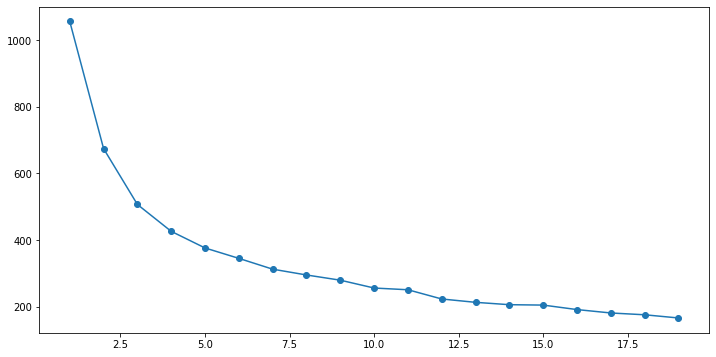

In [209]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [213]:
model_Km = KMeans(n_clusters=2)
model_Km.fit(standard_data)
pred_Km = model_Km.predict(standard_data)

In [214]:
centroids = model_Km.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(standard_data) )

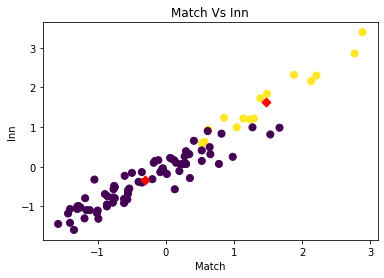

In [215]:
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

xs = standard_data.iloc[:,0]
ys = standard_data.iloc[:,1]

plt.scatter(xs,ys,c=pred_Km,s=50)
plt.scatter(centroid_x,centroid_y,marker='D',c='r',s=40)

plt.xlabel('Match')
plt.ylabel('Inn')
plt.title('Match Vs Inn')
plt.show()

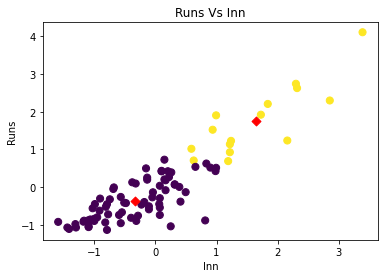

In [216]:
centroid_x = centroids[:,1]
centroid_y = centroids[:,2]

xs = standard_data.iloc[:,1]
ys = standard_data.iloc[:,2]

plt.scatter(xs,ys,c=pred_Km,s=50)
plt.scatter(centroid_x,centroid_y,marker='D',c='r',s=40)

plt.xlabel('Inn')
plt.ylabel('Runs')
plt.title('Runs Vs Inn')

plt.show()

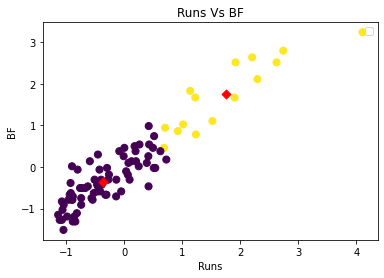

In [217]:
centroid_x = centroids[:,2]
centroid_y = centroids[:,3]

xs = standard_data.iloc[:,2]
ys = standard_data.iloc[:,3]

plt.scatter(xs,ys,c=pred_Km,s=50)
plt.scatter(centroid_x,centroid_y,marker='D',c='r',s=40)

plt.xlabel('Runs')
plt.ylabel('BF')
plt.title('Runs Vs BF')
plt.legend()

plt.show()

#Apply Linear Regression on Number of Innings and Runs

Text(0, 0.5, 'Runs')

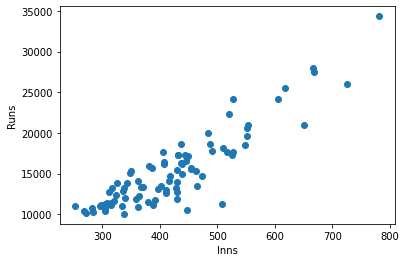

In [240]:
plt.scatter(dataset_sel['Inns'],dataset_sel['Runs'])
plt.xlabel('Inns')
plt.ylabel('Runs')


In [241]:
import numpy as np
x = np.array(dataset_sel['Inns']).reshape((-1, 1))
y = np.array(dataset_sel['Runs'])
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [242]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 

regressor.fit(X_train, y_train) 

LinearRegression()

In [243]:
y_pred = regressor.predict(X_test)


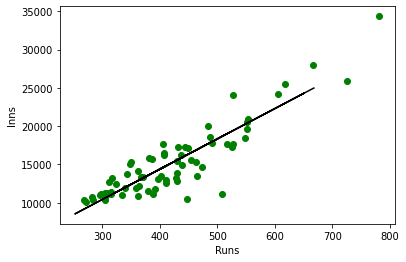

In [244]:
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.xlabel('Runs')
plt.ylabel('Inns')
plt.show()

In [249]:
regressor.score(X_test,y_test)

0.7852077196493376